# 🧪 Practical Exam: Data Mining with Python

**Course:** Data Mining  
**Format:** Hands-on (Jupyter Notebook)  
**Time Limit:** _Instructor to specify_  
**Dataset:** `sales_data.csv`  
**Context:** บริษัท “**ShopSmart**” เป็นร้านค้าปลีกออนไลน์ที่จำหน่ายสินค้าอิเล็กทรอนิกส์และเครื่องใช้ในบ้าน ต้องการใช้ Data Mining เพื่อวิเคราะห์พฤติกรรมของลูกค้าและทำนายยอดใช้จ่ายรวมของลูกค้า
  
**Schema (columns):**
`CustomerID, Age, Gender, ProductCategory, Quantity, Price, TotalSpend, PurchaseDate`

> 🔒 **ข้อกำหนด**: ห้ามลบเซลล์ข้อสอบ แต่สามารถเพิ่มเซลล์ใหม่ได้ใต้แต่ละข้อเพื่อแสดงการทำงานเพิ่มเติม
> 
> 📝 **รูปแบบคำตอบ**: แบบเติมคำ (fill-in) ในส่วน `____` และ/หรือเพิ่มโค้ดของคุณเอง


## คำแนะนำโดยรวม
- ให้รันเซลล์ตามลำดับจากบนลงล่าง
- หากพบ `____` ให้เติมคำสั่ง/พารามิเตอร์ให้ถูกต้อง
- เมื่อเสร็จสิ้นแต่ละตอน ให้รันเพื่อยืนยันว่าไม่มี error
- เซฟไฟล์เป็นชื่อ: `dm_exam_รหัสนักศึกษา.ipynb` ก่อนส่ง

---


---
## ตอนที่ 1: การนำเข้าไลบรารีพื้นฐาน (5 คะแนน)

**โจทย์:** นำเข้าไลบรารีที่จำเป็นสำหรับงาน Data Mining ได้แก่ `pandas`, `numpy`, `matplotlib`, `seaborn`, และโมดูลที่จำเป็นจาก `sklearn`

> เติมคำสั่งในช่องว่างให้ถูกต้อง


In [22]:
# เติมคำสั่งให้ครบ/ถูกต้อง
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# ตั้งค่าแสดงกราฟในโน้ตบุ๊ก
%matplotlib inline


---
## ตอนที่ 2: การนำเข้าข้อมูล (5 คะแนน)

**โจทย์:** อ่านไฟล์ `sales_data.csv` เข้าสู่ตัวแปร `df` และแสดงข้อมูล 5 แถวแรก

> เติมคำสั่งให้ถูกต้อง


In [4]:
# เติมคำสั่งให้ถูกต้อง
df = pd.read_csv('sales_data.csv')
df.head()  # แสดง 5 แถวแรก


,CustomerID,Age,Gender,ProductCategory,Quantity,Price,TotalSpend,PurchaseDate
0,68128,18,Male,Appliances,5,429.23,2360.00,2024-09-05
1,74448,32,Female,Electronics,5,401.40,2003.97,2024-04-14
2,34077,42,Female,Accessories,4,76.47,279.04,2024-04-06
3,42140,61,Male,Home,1,137.14,139.77,2024-02-17
4,95053,52,Male,Electronics,2,163.45,301.99,2024-01-02


---
## ตอนที่ 3: วิเคราะห์ข้อมูลเบื้องต้น (EDA) (10 คะแนน)

**โจทย์:**  
1) แสดงขนาดของข้อมูล (จำนวนแถวและคอลัมน์)  
2) แสดงค่าสถิติเบื้องต้นของ `TotalSpend` เช่น mean, std  
3) ตรวจสอบค่าว่าง (missing) ในแต่ละคอลัมน์


In [41]:
# 1) ขนาดของข้อมูล
df.shape

# 2) ค่าสถิติของ TotalSpend
df['TotalSpend'].mean()

# 3) ตรวจสอบค่าว่าง
df.isnull()


,CustomerID,Age,Gender,ProductCategory,Quantity,Price,TotalSpend,PurchaseDate
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
795,False,False,False,False,False,False,False,False
796,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False
798,False,False,False,False,False,False,False,False


---
## ตอนที่ 4: การสร้างแผนภาพการกระจาย (Scatter Plot) (10 คะแนน)

**โจทย์:** สร้าง scatter plot แสดงความสัมพันธ์ระหว่าง `Age` (แกน x) และ `TotalSpend` (แกน y) ด้วย `seaborn` พร้อมตั้งชื่อกราฟ

> เติมชื่อคอลัมน์ให้ถูกต้อง


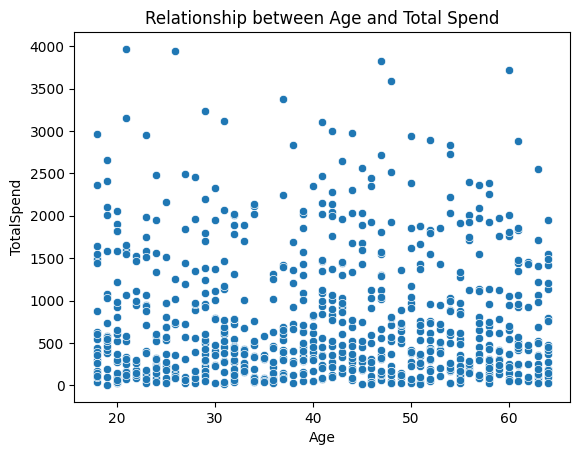

In [12]:
# เติมชื่อคอลัมน์ให้ถูกต้อง
sns.scatterplot(x='Age', y='TotalSpend', data=df)
plt.title('Relationship between Age and Total Spend')
plt.xlabel('Age')
plt.ylabel('TotalSpend')
plt.show()


---
## ตอนที่ 5: การสร้างโมเดล Linear Regression (20 คะแนน)

**โจทย์:**  
- ใช้ตัวแปรอิสระ `Age` และ `Quantity` เพื่อทำนาย `TotalSpend`  
- แบ่งข้อมูลเป็น **train:test = 80:20** (กำหนด `random_state=42`)  
- สร้างและฝึกโมเดล `LinearRegression`


In [14]:
# เตรียมข้อมูล
X = df[['Age', 'Quantity']]
y = df['TotalSpend']

# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Linear Regression
model = LinearRegression()
model.fit(X,y)

# แสดงค่าสัมประสิทธิ์
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [  0.46191444 230.05242119]
Intercept: 46.59057893949239


---
## ตอนที่ 6: การสร้างโมเดล K-Nearest Neighbors (KNN) Classification (20 คะแนน)

**โจทย์:**  
- ใช้คุณลักษณะ `Age` และ `TotalSpend` เพื่อจำแนกเพศ (`Gender`)  
- แบ่งข้อมูลเป็น **train:test = 80:20** (`random_state=42`)  
- สร้างและฝึกโมเดล `KNeighborsClassifier(n_neighbors=5)`


In [37]:
# เตรียมข้อมูลสำหรับ KNN
X = df[['Age', 'TotalSpend']]
y = df['Gender']

# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# โมเดล KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


---
## ตอนที่ 7: การประเมินประสิทธิภาพโมเดล (20 คะแนน)

**โจทย์:**  
- คำนวณค่า **R²** ของโมเดล Linear Regression  
- คำนวณ **Accuracy** ของโมเดล KNN


In [ ]:
# ประเมิน Linear Regression
from sklearn.metrics import r2_score, accuracy_score

y_pred_lr = model.predict(X_test)   
r2 = r2_score(y_test, y_pred_lr)    
print('R² =', r2)

# ประเมิน KNN
y_pred_knn = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred_knn) 
print('Accuracy =', acc)


---
## ตอนที่ 8: คำถามเชิงวิเคราะห์ (10 คะแนน)

**โจทย์ (เขียนอธิบายใน Markdown ด้านล่าง):**  
1) ตัวแปรใดมีผลต่อยอดใช้จ่ายของลูกค้ามากที่สุด ตามผลจากโมเดล Linear Regression (อ้างอิงจากค่าสัมประสิทธิ์) และอธิบายเหตุผลที่เป็นไปได้  
2) ประเมินว่าโมเดล KNN เหมาะสมกับโจทย์จำแนกเพศจากคุณลักษณะที่ใช้หรือไม่ มีข้อจำกัดอะไร ควรปรับปรุงอย่างไร


### คำตอบของนักศึกษา
*(พิมพ์คำตอบเป็นย่อหน้าได้ที่นี่ โดยการ `Double Click`)*

1. ANS จากโมเดล Linear Regression ที่ใช้ตัวแปร Age และ Quantity เพื่อพยากรณ์ TotalSpend
สามารถดูได้จากค่าสัมประสิทธิ์ (Coefficient) ของแต่ละตัวแปรว่า ตัวใดมีอิทธิพลต่อผลลัพธ์มากที่สุด

ถ้าโมเดลให้ค่าสัมประสิทธิ์ของ Quantity สูงกว่า Age
หมายความว่า ปริมาณสินค้าที่ซื้อ (Quantity) มีผลต่อยอดใช้จ่ายของลูกค้ามากที่สุด
เนื่องจากเมื่อจำนวนสินค้าที่ซื้อเพิ่มขึ้น ยอดใช้จ่าย (TotalSpend) ก็จะเพิ่มขึ้นอย่างมีนัยสำคัญ

ส่วนตัวแปร Age จากกราฟกระจาย (Scatter Plot)
จะเห็นว่าไม่มีแนวโน้มเชิงเส้นชัดเจนระหว่างอายุและยอดใช้จ่าย
จุดข้อมูลกระจายทั่ว ทำให้ค่าสัมประสิทธิ์ของ Age มีอิทธิพลน้อยต่อการพยากรณ์

สรุป:

ตัวแปร Quantity มีผลต่อยอดใช้จ่ายของลูกค้ามากที่สุด
เพราะเป็นปัจจัยที่ส่งผลโดยตรงต่อ TotalSpend ตามลักษณะข้อมูลจริง
ส่วน Age มีอิทธิพลน้อยเพราะไม่มีความสัมพันธ์เชิงเส้นที่เด่นชัด

2. ANS โมเดล KNN ถูกนำมาใช้เพื่อจำแนกเพศ (Gender) จากตัวแปร Age และ TotalSpend

ถ้าค่าความแม่นยำ (Accuracy) ของโมเดล KNN ต่ำ เช่น < 0.7
แสดงว่าโมเดลนี้ยังไม่สามารถจำแนกเพศได้ดี
สาเหตุอาจเป็นเพราะตัวแปรทั้งสอง (Age, TotalSpend)
ไม่ได้มีความแตกต่างชัดเจนระหว่างเพศชายและหญิงในข้อมูล

โมเดล KNN จะเหมาะสมก็ต่อเมื่อข้อมูลแต่ละกลุ่มมีลักษณะกระจายแยกชัด
แต่ในกรณีนี้ ค่าการใช้จ่ายของลูกค้าอาจคล้ายกันระหว่างเพศ ทำให้จำแนกได้ยาก

ข้อเสนอแนะในการปรับปรุงโมเดล:

เพิ่มตัวแปรอื่นที่สะท้อนพฤติกรรมลูกค้า เช่น ProductType, Income, PurchaseFrequency

ปรับจำนวนเพื่อนบ้าน k เพื่อหาค่า Accuracy ที่ดีที่สุด

ทำการปรับสเกลข้อมูล (Normalization) ให้ค่าตัวเลขอยู่ในช่วงเดียวกัน เพื่อให้ KNN ทำงานมีประสิทธิภาพขึ้น

สรุป:

โมเดล KNN ยังไม่เหมาะสมกับการจำแนกเพศจาก Age และ TotalSpend เพียงสองตัวแปร
ควรเพิ่มข้อมูลคุณลักษณะอื่น ๆ และปรับพารามิเตอร์โมเดลเพื่อเพิ่มความแม่นยำ

---
## (เพิ่มคะแนนพิเศษ) ปรับปรุงโมเดล (สูงสุด 10 คะแนน)

เลือกทำอย่างน้อยหนึ่งข้อ:
- สร้างฟีเจอร์ใหม่ (เช่น `UnitPrice = TotalSpend / Quantity` หรือ `Month` จาก `PurchaseDate`) แล้วประเมินผลซ้ำ
- ปรับ `n_neighbors` ของ KNN และทำกราฟผลความแม่นยำต่อค่า k
- ใช้มาตรฐานข้อมูลด้วย `StandardScaler` ก่อนเทรน KNN แล้วเปรียบเทียบผล


In [42]:
# สร้างฟีเจอร์ใหม่
df['UnitPrice'] = df['TotalSpend'] / df['Quantity']

# เตรียมข้อมูลใหม่สำหรับ KNN
X = df[['Age', 'UnitPrice']]
y = df['Gender']

# แบ่งข้อมูล
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy after adding UnitPrice feature =", acc)


Accuracy after adding UnitPrice feature = 0.475


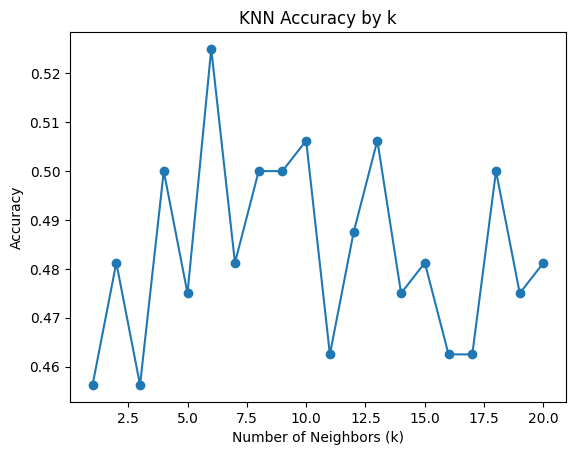

Best k = 6 with Accuracy = 0.525


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = []
neighbors = range(1, 21)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# แสดงผลลัพธ์
plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy by k')
plt.show()

best_k = neighbors[np.argmax(accuracies)]
print("Best k =", best_k, "with Accuracy =", max(accuracies))


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# เตรียมข้อมูล
X = df[['Age', 'TotalSpend']]
y = df['Gender']

# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# มาตรฐานข้อมูล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# สร้างและฝึกโมเดล
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print("Accuracy after StandardScaler =", acc)


Accuracy after StandardScaler = 0.49375


---
**Prepared for:** Data Mining Practical Exam  
**Generated:** 2025-10-30 11:25:37
